Name : Jainam Rajput

SAP-ID : 60009200022

Div/Batch : K/K1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'/content/Daily_Electricity_Consumption.csv',header=0,index_col=0)
df.head()

,usage,cost
Date,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84


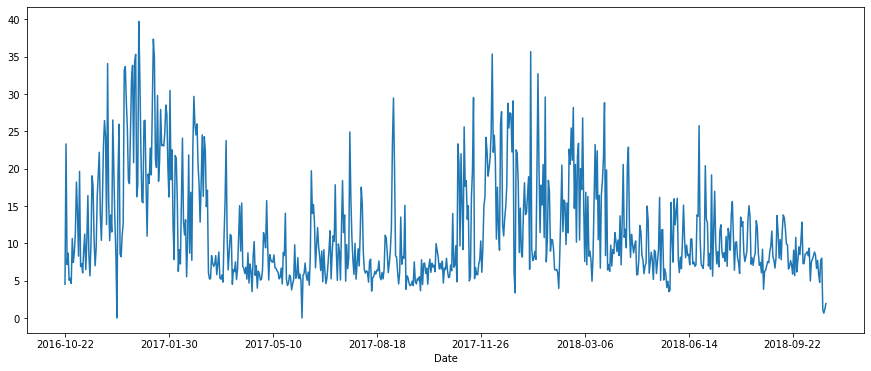

In [ ]:
df['usage'].plot(figsize=(15,6))

In [ ]:
df.shape

(733, 2)

In [ ]:
X = df['usage']
x = pd.DataFrame(X,columns=['usage'])
x.head()

,usage
Date,
2016-10-22,4.52
2016-10-23,23.32
2016-10-24,7.16
2016-10-25,8.68
2016-10-26,5.04


In [ ]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') 
    dfoutput = pd.Series(dftest[0:4], index=['Test_Stats','P_Value','No_Of_Observation_Used','Critical_Value'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value 
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(x,'usage')

Results of Dickey-Fuller Test for column: usage
Test_Stats                 -2.423278
P_Value                     0.135274
No_Of_Observation_Used     19.000000
Critical_Value            713.000000
Critical Value (1%)        -3.439555
Critical Value (5%)        -2.865602
Critical Value (10%)       -2.568933
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


**The Data is not stationary so we need to take differening of the data values to make it stationary and then check it using ADF test**

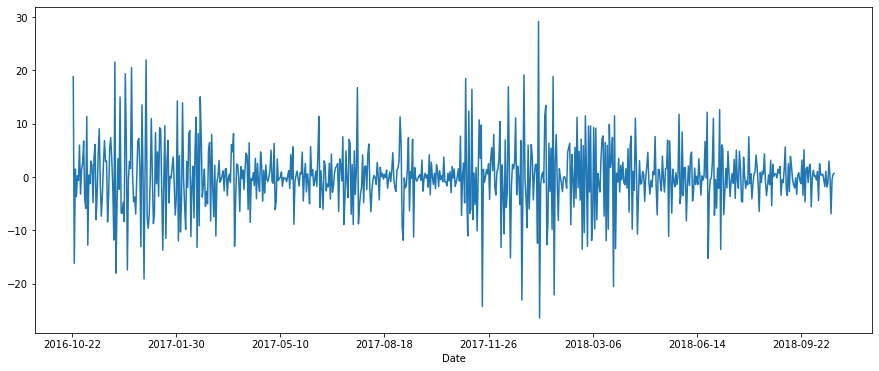

In [ ]:
x['usage'].diff().plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(x['usage'].diff().dropna(),'usage')

Results of Dickey-Fuller Test for column: usage
Test_Stats               -1.037090e+01
P_Value                   2.265619e-18
No_Of_Observation_Used    1.800000e+01
Critical_Value            7.130000e+02
Critical Value (1%)      -3.439555e+00
Critical Value (5%)      -2.865602e+00
Critical Value (10%)     -2.568933e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


**We have finally made our data stationary and also proved the statinarity using Augmented Dickey Fuller Test**